<center>
    <h1>Systèmes intelligents et apprentissage machine</h1>
    <h2>ETS GTI770 (Eté 2018)</h2>
    <h2>Travaux Pratiques:  Rapport TP01</h2>
    <h4>Equipe 5 : Fabeleu Kouemo Carole, Illy Poulmanogo, Ouedraogo Thierry</h4>
</center>

## Introduction
L'apprentissage machine tente de reproduire la faculté de reconnaissance humaine qui ne conserve, inconsciemment, que les informations pertinentes à la différenciation d'objets ou de perceptions.
C'est suivant cette approche que le présent laboratoire tente d'appliquer la théorie d'apprentissage machine, en suivant trois étapes essentielles :

- Lecture d'information et extraction des données pertinentes, le plus unitairement possible. Ces données sont dites "primitives". Une évaluation de la pertinence de ces primitives ainsi que celle de leur pouvoir discriminant sera également effectuée.
- L'interprétation de ces données et leur utilisation dans une stratégie d'apprentissage machine, suivant la méthode des arbres de décision.
- L'évaluation de la performance de l'apprentissage, par l'évaluation de la précision de classification sur un jeu de données différentes de celui qui a été utilisé pour entrainer le système.

Les articles qui nous ont permis de mieux comprendre la marche à suivre et surtout, les alternatives qui nous sont offertes proviennent principalement du cours de GTI770 et de recherches sur internet.
Plus particulièrement, l'article suivant : http://cvgl.stanford.edu/teaching/cs231a_winter1415/prev/projects/C231a_final.pdf
Il contient des informations pertinentes sur les primitives standards et le contexte idéal de leur utilisation.
Ou encore cet article : https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
Ce dernier fut un très bon point d'entrée sur la compréhension de l'extraction d'une primitive et, surtout, comment l'utiliser dans un contexte de classification.

Fort de ces recherches, il, nous a été permis de séelectionner les primitives que nous estimitions les plus pertinentes et applicables dans le contexte du jeu de données qui est mis à notre disposition. Nous avons donc opté pour l'utilisation de duex primitives populaires et une primitive totalement pensée sur mesure pour le contexte du laboratoire. Le but étant de diversifier le plus possible le type de primitive utilisé pour accroître le taux de succés de l'apprentissage. 

## I. Chargement des images et pré-traitements

### I.1. Chargement des données

Nous avons téléchargé le dataset fourni depuis Moodle pour ce TP. Nous fesons un chargement, en utilisant le fichier GTI770_label_data_set.csv, des 50 premières données de chaque classe. Toutes les images sont chargées dans une matrice (X) et les labels dans une matrice (Y). X a la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur) et Y la forme(nombre d'image, la classe).

In [64]:
import numpy as np
import os
import cv2

#Chargement du fichier CSV contenant le classement des images
csvFile = open("Dataset_GTI770\csv\GTI770_label_data_set.csv", "r")
#Definition de la matrice pour charger les 100 images (50 pour chacun des deux classes (smooth, spiral))
# Toutes les images de dataset sont de format (424, 424,3)
X = np.zeros((1000, 424, 424, 3))

#Y = np.array((1000,10), dtype=object)
Y = np.zeros(1000, dtype='object')
nombre_img_smooth = 0
nombre_img_spiral = 0
count = 0
#Parcourir le fichier CSV ligne par ligne
for i in csvFile :
    #Recuperation des valeurs de deux colonnes
    id, classe = i.split(",")
    #Sauter la ligne des attributs (meta-données)
    if id == "id":
        continue
    #Control de la limitation de la taille du dataset
    if "smooth" in classe and nombre_img_smooth < 500 : 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_smooth+=1
        count += 1
    if "spiral" in classe and nombre_img_spiral < 500: 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_spiral+=1
        count += 1
    if count >= 1000 :
        break
print("Chargement du dataset terminé")
print("Nombre d'images : ", count)
print("Nombre d'images smooth : ", nombre_img_smooth)
print("Nombre d'images spiral : ", nombre_img_spiral)

print("Cellule executée avec succès")

Chargement du dataset terminé
Nombre d'images :  1000
Nombre d'images smooth :  500
Nombre d'images spiral :  500
Cellule executée avec succès


### I.2. Vérification des données chargées
Nous affichons de manière aléatoire 2 images de chaque classe.

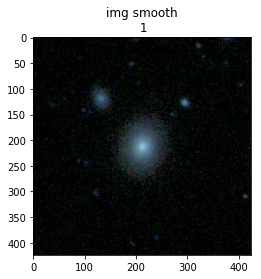

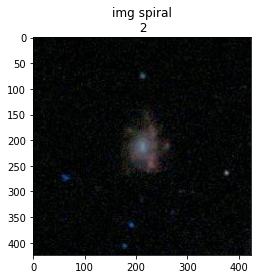

Cellule executée avec succès


In [65]:
import matplotlib.pyplot as plt
# Affichage des 2 premières images 
for id in range(2) :
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" "+str(id+1))
    plt.show()
print("Cellule executée avec succès")

### I.3. Séparation des données d'apprentissage, des données de test et des données de validation
Nous fesons une séparation des données en dataset de train, de test et de validation. Chaque dataset a le même nombre de classes (50% smooth, 50% spiral). Les données ont toujours les mêmes classes.

In [67]:
# Séparation des ids des images spirals et des ids des images smooths
j = 0
k = 0
img_smooth_ids = np.zeros(500)
img_spiral_ids = np.zeros(500)
for i in range(1000):
    if "smooth" in Y[i] :
        img_smooth_ids[j] = i
        j+=1
    if "spiral" in Y[i] :
        img_spiral_ids[k] = i
        k+=1

# Séparation des des donnees de train, test et validation

X_train = np.zeros((600, 424, 424,3))
Y_train = np.zeros(600, dtype='object')

   
X_test = np.zeros((200, 424, 424,3))
Y_test = np.zeros(200, dtype='object')
    

X_validation = np.zeros((200, 424, 424,3))
Y_validation = np.zeros(200, dtype='object')

j = 0
k = 0
l = 0

nombre_img_spiral = 0
nombre_img_smooth = 0

for i in img_spiral_ids :
    i = int(i)
    if nombre_img_spiral < 100 :
        X_test[j] = X[i]
        Y_test[j] = Y[i]
        j+=1
    elif nombre_img_spiral < 200:
        X_validation[k] = X[i]
        Y_validation[k] = Y[i]
        k+=1
    else :
        X_train[l] = X[i]
        Y_train[l] = Y[i]
        l+=1
    nombre_img_spiral+=1

for i in img_smooth_ids :
    i= int(i)
    if nombre_img_smooth < 100 :
        X_test[j] = X[i]
        Y_test[j] = Y[i]
        j+=1
    elif nombre_img_smooth < 200:
        X_validation[k] = X[i]
        Y_validation[k] = Y[i]
        k+=1
    else : 
        X_train[l] = X[i]
        Y_train[l] = Y[i]
        l+=1
    nombre_img_smooth+=1

print("Dataset partionné ")
print("X_train, Y_train : ", len(X_train))
print("X_test, Y_test :", len(X_test))
print("X_validation : ", len(X_validation))
print("Cellule executée avec succès")

Dataset partionné 
X_train, Y_train :  600
X_test, Y_test : 200
X_validation :  200
Cellule executée avec succès


### I.4. Pré-traitements des données d'apprentissage
Pour éliminer certains bruits, notamment les étoiles lointaines dans l’arrière-plan, nous fesons un cropp de toutes  les images en utilisant le centre de l'image. La nouvelle dimension fait 100x100. Nous n'utilisons que numpy pour cela. Toutes les images croppées sont dans une matrice(X_train_crop)

In [68]:
# Definition d'une fonction qui cropp une image à partir du centre et selon les nouvelles tailles données
def cropper_centre(img, nouveauX, nouveauY):
    milieuX = img.shape[0]/2
    debutX = int(milieuX - nouveauX/2)
    finX = int(milieuX + nouveauX/2)
    milieuY = img.shape[1]/2
    debutY = int(milieuY - nouveauY/2)
    finY = int(milieuY + nouveauY/2)
    img = img[debutX:finX, debutY:finY, :]
    return img

#Teste de notre fonction avec une image, 100259.jpg
#imagePath = 'Dataset_GTI770\images_training/100259.jpg'
#img = cv2.imread(imagePath)
#plt.imshow(img)
#plt.show()
#print(img.shape)
#imgcrop = cropper_centre(img, 50, 50)
#print(imgcrop.shape)
#plt.imshow(imgcrop)
#plt.figure()


#Cropp de toutes les images dans X_train vers X_train_crop
X_train_crop = np.zeros((600, 100, 100, 3))
X_train_crop_index = 0
for i in X_train:
    X_train_crop[X_train_crop_index] = cropper_centre(X_train[X_train_crop_index], 100, 100)
    X_train_crop_index+=1

print("Cellule executée avec succès")

Cellule executée avec succès


### I.5. Visualisation des données pré-traitées
Nous affichons une image de chaque catégorie avec le crop.

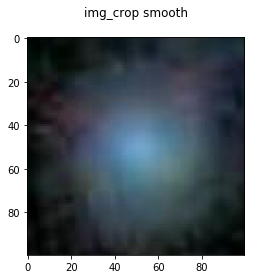

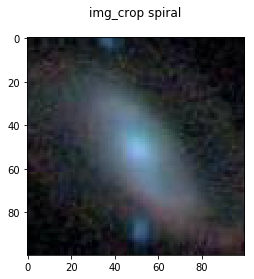

Cellule executée avec succès


In [69]:
X_train_crop_index = 0
nb_plt_smooth = 0
nb_plt_spiral = 0
for i in Y_train:
    if "smooth" in Y[X_train_crop_index] and nb_plt_smooth == 0:
        plt.imshow(X_train_crop[X_train_crop_index]/255)
        plt.title("img_crop "+Y[X_train_crop_index])
        plt.show()
        X_train_crop_index+=1
        nb_plt_smooth=1
    else :
        if "spiral" in Y[X_train_crop_index] and nb_plt_spiral == 0:
            plt.imshow(X_train_crop[X_train_crop_index]/255)
            plt.title("img_crop "+Y[X_train_crop_index])
            plt.show()
            X_train_crop_index+=1
            nb_plt_spiral=1
    if nb_plt_smooth == 0 and nb_plt_spiral == 0 :
        break
print("Cellule executée avec succès")

Nous définissons une fonction permettant de transformer une image en RGB en Grascale et nous affichons ici une image de chaque catégorie avec le crop et la transformation en grayscale.

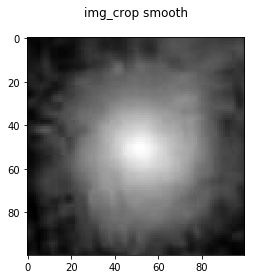

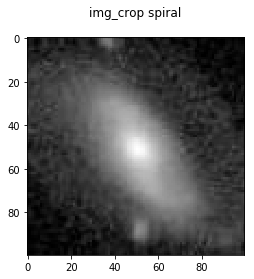

Cellule executée avec succès


In [70]:

def rgbToGrayscale(img):
    gray = img.astype(np.float32)
    gray = cv2.cvtColor(gray , cv2.COLOR_BGR2GRAY)
    return gray

X_train_crop_index = 0
nb_plt_smooth = 0
nb_plt_spiral = 0
for i in Y_train:
    if "smooth" in Y[X_train_crop_index] and nb_plt_smooth == 0:
        plt.imshow(rgbToGrayscale(X_train_crop[X_train_crop_index]),"gray")
        plt.title("img_crop "+Y[X_train_crop_index])
        plt.show()
        X_train_crop_index+=1
        nb_plt_smooth=1
    else :
        if "spiral" in Y[X_train_crop_index] and nb_plt_spiral == 0:
            plt.imshow(rgbToGrayscale(X_train_crop[X_train_crop_index]),"gray")
            plt.title("img_crop "+Y[X_train_crop_index])
            plt.show()
            X_train_crop_index+=1
            nb_plt_spiral=1
    if nb_plt_smooth == 0 and nb_plt_spiral == 0 :
        break
print("Cellule executée avec succès")

## II. Choix de primitives, extractions et évaluation

### II.1. Première primitive : Local Binary Patterns (LBP)


#### II.1.1. Choix de la primitive 
Le local Binary Patterns, plus connu sous l'acronyme LBP, est une primitive principalement utilisée pour la reconnaissance des textures. Son principe se base sur la comparaison de la luminance entre un noyau et ses plus proches voisins, de ou notamment, l'importance de travailler avec une image en niveau de gris. Si la surface représentée contient donc des irrégularités, celles-ci seront interprétées et un leurs "patterns" seront conservés.
Par exemple, si un noyau a une luminance de 3, alors ses voisins ayant une luminance supérieure seront remplacés par des 1 et les autres par 0. La matrice ainsi obtenue permet de dresser un histogramme qui peut alors être comparé à un échantillon afin de dresser un ratio de différence en utilisant l'entropie relative. Plus ce ratio est proche de 0 et moins il y a de divergence globale entre les deux histogrammes. 
Dans le cas de ce présent laboratoire, ce choix a été fait principalement, parce que les spirales présentent, pour la plupart, des irrégularités dans la distribution de leur luminance, ainsi, il y a matière a différencier les spirales des "smooth" qui présente une diminution plus linéaire de leurs intensités lumineuses à mesure que l'on s'éloigne du centre.

#### II.1.2. Extraction de la primitive

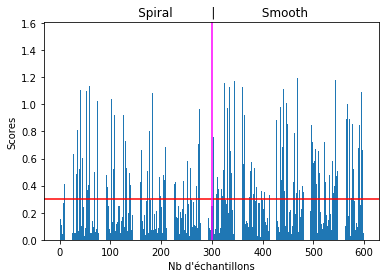

On constate que la majorité des images de la classe "spiral" on un
score inférieur à 0.3. Il s'agirat donc du seuil qui sera utilisé pour
détecter cette classe.


In [72]:
from skimage.feature import local_binary_pattern
from skimage import img_as_float

# Ces constantes servent à définir la méthode utilisée pour le LBP ainsi que la taille des sections
# pour lesquels on va procéder à la comparaison des voisins. Ici, une matrice de 16x16 en raison de
# la faible définition de images (idéalement, une matrice de 3x3 donnerait un résultat plus précis).
METHOD = 'uniform'
radius = 8
n_points = 16 * radius


# Le code source de la fonction "kullback_leibler_divergence" provient de :
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
# Il s'agit d'une fonction permettant de comparer deux images binaires par leurs historgrames et 
# retourne un ratio de leur divergence (donc un score de 0.0 signifie qu'il n'y a aucune divergence).
# Cette fonction est aussi appelée "L'entropie relative" ou la différence de Kullback-Leibler du nom de
# leurs inventeurs.
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

def extract_lbp_primitives(ref, images):
    
    # On commence par déterminer un histograme de référence (ici, la première image, qui est une spirale).
    # Pour se faire on récupère l'image de référence à deux dimensions et on extrait son LBP qui servira à bâtir
    # l'histogramme associé grâce à des fonctions des librairies Numpy et Skimage
    lbp_ref = local_binary_pattern(rgbToGrayscale(ref), n_points, radius, METHOD)
    n_bins = int(lbp_ref.max() + 1)
    ref_hist, _ = np.histogram(lbp_ref, normed=True, bins=n_bins, range=(0, n_bins))
    
    # Pour chaque image d'entrainement, on compare l'histogramme de son LBP avec celui de référence. 
    scores = []
    for index,img in enumerate(images) : 

        image = images[index]

        # On extrait l'histogramme de son LBP.
        lbp = local_binary_pattern(rgbToGrayscale(image), n_points, radius, METHOD)
        n_bins = int(lbp_ref.max() + 1)
        hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))

        # On évalue son score grâce à la fonction "Kullback-Leibler divergence".
        # Note : plus le score est proche de 0 et plus il y a de similitude.
        score = kullback_leibler_divergence(hist, ref_hist)

        scores.append(score)
        
    return scores

lbp_primitives = extract_lbp_primitives(X_train_crop[0], X_train_crop)
lbp_treshold = 0.30

# On affiche un diagramme en bar afin de mieux visualiser quel serait le bon seuil
# à utiliser.
x_axis = range(len(lbp_primitives))
plt.bar(x_axis, lbp_primitives)
plt.axhline(y=lbp_treshold,color='red')
plt.axvline(x=round(len(lbp_primitives) / 2), color='magenta')
plt.title("              Spiral          |            Smooth        ")
plt.xlabel("Nb d'échantillons")
plt.ylabel("Scores")

fig = plt.gcf()

plt.show()


print('On constate que la majorité des images de la classe "spiral" on un\n'+
'score inférieur à ' + str(lbp_treshold) + '. Il s\'agirat donc du seuil qui sera utilisé pour\n'+
'détecter cette classe.')

#### II.1.3. Evaluation de la première primitive

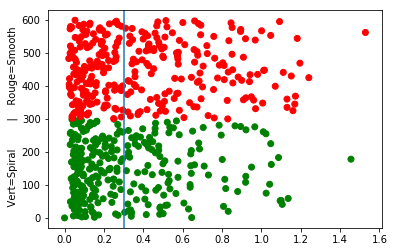

On constate qu'à partir d'un seuil de séparation de 0.3 au niveau du score,
on obtient une sépration des classes. La majorité des éleément de la classe "Smooth"
se trouvent au dessus de 0.3 tandis que ceux de la classe "Spiral", se trouvent
en dessous de 0.3. Quand bien même cette primitive n'est pas idéale, elle reste détient
toutefois un pouvoir disciminant acceptable.


In [74]:
from matplotlib.colors import ListedColormap

colors = np.zeros(len(lbp_primitives), dtype = "uint8")
middle = round(len(lbp_primitives) / 2)
for index,img in enumerate(lbp_primitives) : 
    colors[index] = 0 if index < middle else 1
    
graph = plt.scatter(lbp_primitives, range(len(lbp_primitives)), c=colors, cmap=ListedColormap(['green','red']))
plt.axvline(x=lbp_treshold)
plt.ylabel("    Vert=Spiral         |    Rouge=Smooth  ")
plt.show()

print("On constate qu'à partir d'un seuil de séparation de " + str(lbp_treshold) + " au niveau du score,\n"+
      "on obtient une sépration des classes. La majorité des éleément de la classe \"Smooth\"\n"+
      "se trouvent au dessus de " + str(lbp_treshold) + " tandis que ceux de la classe \"Spiral\", se trouvent\n"+
      "en dessous de " + str(lbp_treshold) + ". Quand bien même cette primitive n'est pas idéale, elle reste détient\n"+
      "toutefois un pouvoir disciminant acceptable.")

### II.2. Deuxième primitive : Histogram of Oriented Gradients (HOG)


#### II.2.1. Choix de la primitive 
Le Histogram of oriented gradients, plus communément appelé HOG, est une méthode d'extraction d'une primitive de classification principalement basée sur l'histogramme résultant de la détection de la direction des bords d'un objet représenté par une image. Dans le contexte du présent laboratoire, ces bords sont en essentiellement les variations les plus importantes d'intensité lumineuse sur une image en niveau de gris.
Le choix de cette primitive a été motivé par le fait fait que les classes smooth et spirales n'ont pas les mêmes bordures, de par leur variation non-forcement constante de leur luminance. Une image de type "spirale" donc, aura plus de bordure orientée , et de façons plus diverses qu'une image de type "smooth". Cette primitive peut donc présenter une capacité de séparation de ces deux classes.


#### II.2.2. Extraction de la primitive

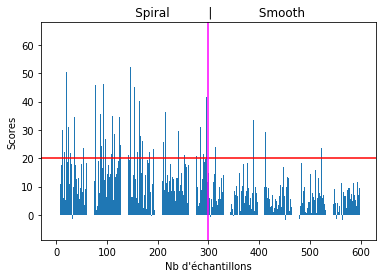

On constate que la majorité des images de la classe "spiral" ont un
score supérieur à 20. Il s'agira donc du seuil qui sera utilisé pour
détecter cette classe.


In [75]:
from skimage.feature import hog


def extract_hog_primitives(ref, images):
    
    scores = []

    # On extrait l'histogramme du HOG d'une image de référence, ici, la première de nos échantillons,
    # et donc, une spirale.
    hist_ref, hog_image_ref = hog(rgbToGrayscale(ref), orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualise=True, block_norm='L2-Hys')

    # Pour chaque échantillon, on compare l'histograme de son HOG à celui de l'image
    # de référence grâce à la méthode d'entropie relative.
    for index,img in enumerate(images) : 

        image = images[index]

        # On extrait l'histogramme correspondant.
        hist, hog_image = hog(rgbToGrayscale(image), orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualise=True, block_norm='L2-Hys')

        # On évalue son score par raport à l'histogramme de référence.
        score = kullback_leibler_divergence(hist, hist_ref)
        scores.append(score)
        
    return scores

hog_primitives = extract_hog_primitives(X_train_crop[0], X_train_crop)

hog_treshold = 20

# On affiche un diagramme en bar afin de mieux visualiser quel serait le bon seuil
# à utiliser.
x_axis = range(len(hog_primitives))
plt.bar(x_axis, hog_primitives)
plt.axhline(y=hog_treshold,color='red')
plt.axvline(x=round(len(hog_primitives) / 2), color='magenta')
plt.title("              Spiral          |            Smooth        ")
plt.xlabel("Nb d'échantillons")
plt.ylabel("Scores")

fig = plt.gcf()

plt.show()


print('On constate que la majorité des images de la classe "spiral" ont un\n'+
'score supérieur à ' + str(hog_treshold) + '. Il s\'agira donc du seuil qui sera utilisé pour\n'+
'détecter cette classe.')


#### II.2.3. Evaluation de la primitive

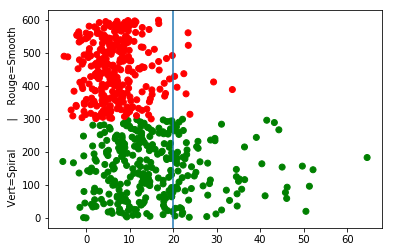

On constate qu'à partir d'un seuil de séparation de 20 au niveau du score,
on obtient une sépration des classes. La majorité des élément de la classe "Smooth"
se trouvent en dessous de 20 tandis que ceux de la classe "Spiral", se trouvent
au dessus de 20. Quand bien même cette primitive n'est pas idéale, elle reste détient
toutefois un pouvoir disciminant acceptable.


In [76]:

colors = np.zeros(len(hog_primitives), dtype = "uint8")

for index,img in enumerate(hog_primitives) : 
    colors[index] = 0 if index < round(len(lbp_primitives) / 2) else 1
    
graph = plt.scatter(hog_primitives, range(len(hog_primitives)), c=colors, cmap=ListedColormap(['green','red']))
plt.axvline(x=hog_treshold)
plt.ylabel("    Vert=Spiral         |    Rouge=Smooth  ")
plt.show()

print("On constate qu'à partir d'un seuil de séparation de " + str(hog_treshold) + " au niveau du score,\n"+
      "on obtient une sépration des classes. La majorité des élément de la classe \"Smooth\"\n"+
      "se trouvent en dessous de " + str(hog_treshold) + " tandis que ceux de la classe \"Spiral\", se trouvent\n"+
      "au dessus de " + str(hog_treshold) + ". Quand bien même cette primitive n'est pas idéale, elle reste détient\n"+
      "toutefois un pouvoir disciminant acceptable.")

### II.3. Troisième primitive : Nombre Points lumineux décentralisés


#### II.3.1. Choix de la primitive 
Nous constatons que les galaxies smooth on une luminosité strictement décroissante au fur et à mesure qu'on s'éloigne du centre. Pourtant les galaxies spiral a une luminausité suivant le spiral. Dans les galaxies spirales on rencontre une alternance de luminosité au fur et à mesure qu'on s'éloigne du centre. Par conséquent cette primitive compte le nombre de pixels plus lumineux que des pixels plus près du centre afin de quantifier cette différence dans ces deux types de galaxies.

#### II.3.2. Extraction de la primitive

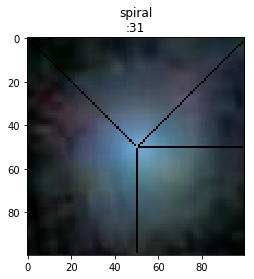

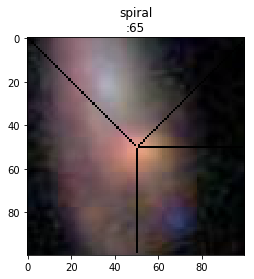

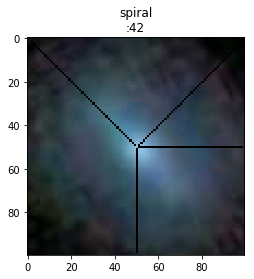

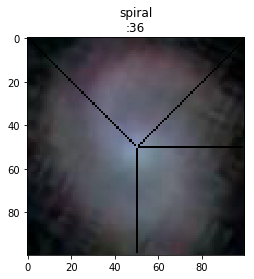

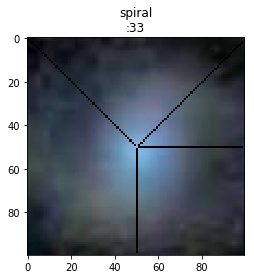

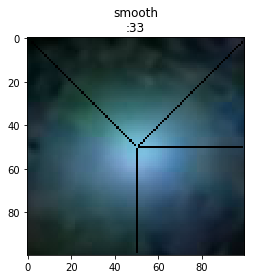

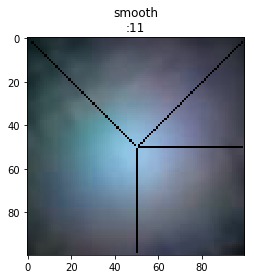

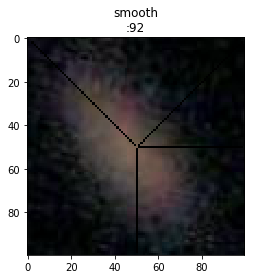

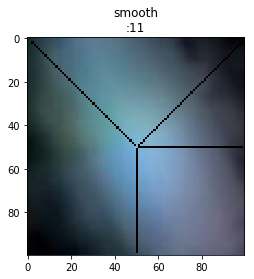

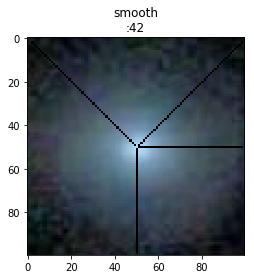

In [114]:

def extract_LumExt_primitives(images, images_a_visualiser, ctr):#ctr=50
        
    nombre_point_lum_hors_centre = 0
    LumExt_primitives = []
    
    for index,element in enumerate(images) : 
        
        image = images[index]
        
        #Conversion de l'image en grayScale
        image=image.astype(np.float32)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        #On considère les pixels (50,50) à (50,100), soit 50 pixels
        centre_y = ctr
        centre_x = ctr
        nombre_point_lum_hors_centre = 0

        #h_d (horizontal->doite)
        decal_hor_droite = centre_x
        centre_lum_min_h_d = gray_image[centre_y][decal_hor_droite]

        #d_d (diagonal->doite)
        decal_diag_droite = centre_x
        centre_lum_min_d_d = gray_image[centre_y][decal_diag_droite]

        #d_g (diagonal->gauche)
        decal_diag_gauche = centre_x
        centre_lum_min_d_g = gray_image[centre_y][decal_diag_gauche]

        #v_b (vertical->bas)
        decal_vert_bas = centre_x
        centre_lum_min_v_b = gray_image[centre_y][decal_vert_bas]

        decal = 1
        for j in gray_image :
            #print(str(decal)+" "+str(gray_image[50][decal]))
            #print(gray_image[200][decal])

            #extraction horizontal->doite
            decal_hor_droite+=1
            if gray_image[centre_y][decal_hor_droite] >= centre_lum_min_h_d :
                nombre_point_lum_hors_centre+=1
            else : 
                centre_lum_min_h_d = gray_image[centre_y][decal_hor_droite]
            image[centre_y][decal_hor_droite]= 0

            #extraction diagonal->droite
            decal_diag_droite+=1
            if gray_image[centre_y-decal][decal_diag_droite] >= centre_lum_min_d_d :
                nombre_point_lum_hors_centre+=1
            else : 
                centre_lum_min_d_d = gray_image[centre_y-decal][decal_diag_droite]
            image[centre_y-decal][decal_diag_droite]= 0

            #extraction diagonal->gauche
            decal_diag_gauche-=1
            if gray_image[centre_y-decal][decal_diag_gauche] >= centre_lum_min_d_g :
                nombre_point_lum_hors_centre+=1
            else : 
                centre_lum_min_d_g = gray_image[centre_y-decal][decal_diag_gauche]
            image[centre_y-decal][decal_diag_gauche]= 0

            #extraction vertical->bas
            #decal_vert_bas+=1
            if gray_image[centre_y+decal][decal_vert_bas] >= centre_lum_min_v_b :
                nombre_point_lum_hors_centre+=1
            else : 
                centre_lum_min_v_b = gray_image[centre_y+decal][decal_vert_bas]
            image[centre_y+decal][decal_vert_bas]= 0


            decal+=1
            if decal == 49 : 
                break

        #print(nombre_point_lum_hors_centre)
        LumExt_primitives.append(nombre_point_lum_hors_centre)
        if images_a_visualiser is not None:
            images_a_visualiser[index] = image
    return LumExt_primitives

# On procede a l'extraction de la primitive
images_a_visualiser = np.zeros((600, 100, 100,3))
nombre_point_lum_hors_centres = extract_LumExt_primitives(X_train_crop, images_a_visualiser, 50)
    
#Visualisation de la procedure d'extraction
count_data_set = 0
for i in images_a_visualiser : 
    image = images_a_visualiser[count_data_set]
    plt.imshow(image/255)
    plt.title(""+str(Y_train[count_data_set])+":"+str(nombre_point_lum_hors_centres[count_data_set]))
    plt.show()
    #affichage de chaque 6 images
    count_data_set+=64
    if(count_data_set) >= images_a_visualiser.shape[0] :
        break

#### II.3.3. Evaluation de la primitive

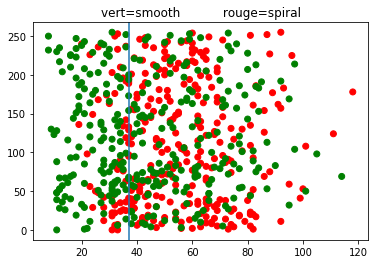

Pour un seuil de séparation de 46
Nous constatons que les smooth (vert) sont majoritairement à gauche 
Et les spirales (rouge), majoritairement à droite


In [80]:
from matplotlib.colors import ListedColormap
from random import randint

colors = ['green','red']
cm_bright = ListedColormap(colors)

# Pour dispercer les point suivant l'axe y (eviter la superposition) etant donner que c'est un seul attribut à visualiser
y = np.zeros(600, dtype = "uint8")
j=0
for i in y :
    y[j] = j
    j+=1
    
#Transformation de l'attribut cible en numerique
Y_train_data = np.zeros(600, dtype = "uint8")
v_index = 0
for i in Y_train : 
    if "smooth" in Y_train[v_index]:
        Y_train_data[v_index] = 0
    else :
        Y_train_data[v_index] = 1
    v_index+=1
    
#Africhage des valeurs de la primitives et des valeurs y utiliser pour les dispercer (eviter la superposition)
#print(nombre_point_lum_hors_centres)
#print("==================================")
#print(y)
#print("==================================")
#print (Y_train)
#print (Y_train_data)

#Visualisation du pouvoir discriminant de la primitive
graph = plt.scatter(nombre_point_lum_hors_centres, y, c=Y_train_data, cmap=cm_bright)
xc =  37
plt.axvline(x=xc)
plt.title ("vert=smooth           rouge=spiral")
plt.show()
print("Pour un seuil de séparation de 46")
print("Nous constatons que les smooth (vert) sont majoritairement à gauche ")
print("Et les spirales (rouge), majoritairement à droite")


#### II.4. Visualisation de deux primitives

En générant un graphique montrant la répartition des images suivant la combinaison de deux de leurs primitives extraites précédemment, en l'occurance HOG et LBP, on constate une séparation, certes non optimale, mais efficace, des classes "smooth" et "spirale".
Une diagonale pourrait facilement être tracées pour illustrer cette séparation.
Il reste touefois une quantité important de confusion de ces deux classes, comme peut le montrer la zone contenant un amalgame des deux. Ces forte confusion démontre que magré le pouvoir discriminant de ces deux primitives, il y a matière à amélioration, soit de leur extraction, soit par le choix d'autres primitives, plus adaptées.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

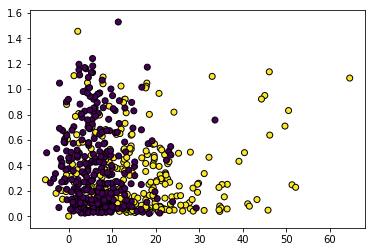

In [81]:
print(Y_train_data)
graph = plt.scatter(hog_primitives, lbp_primitives, c=Y_train_data, edgecolors='k')
plt.show()

#### II.5. Construction du tableau de primitives X_train_data

In [85]:
X_train_data = np.zeros((600,3))
count = 0
for i in range(600) :
    X_train_data[count][0] = lbp_primitives[count]
    X_train_data[count][1] = hog_primitives[count]
    X_train_data[count][2] = nombre_point_lum_hors_centres[count]
    count+=1
print(X_train_data)

[[ 0.00000000e+00  0.00000000e+00  3.10000000e+01]
 [ 6.46004211e-01 -5.79095808e-01  7.30000000e+01]
 [ 1.51729247e-01  2.36864452e+01  5.60000000e+01]
 ...
 [ 6.61027584e-01  1.11727243e+01  7.50000000e+01]
 [ 5.14969616e-01  9.62420273e+00  7.10000000e+01]
 [ 5.31123267e-02  1.66207200e+01  3.50000000e+01]]



## III. Implémentation et analyse de l’arbre de décision


### III.1. Implémentation de l’arbre de décision

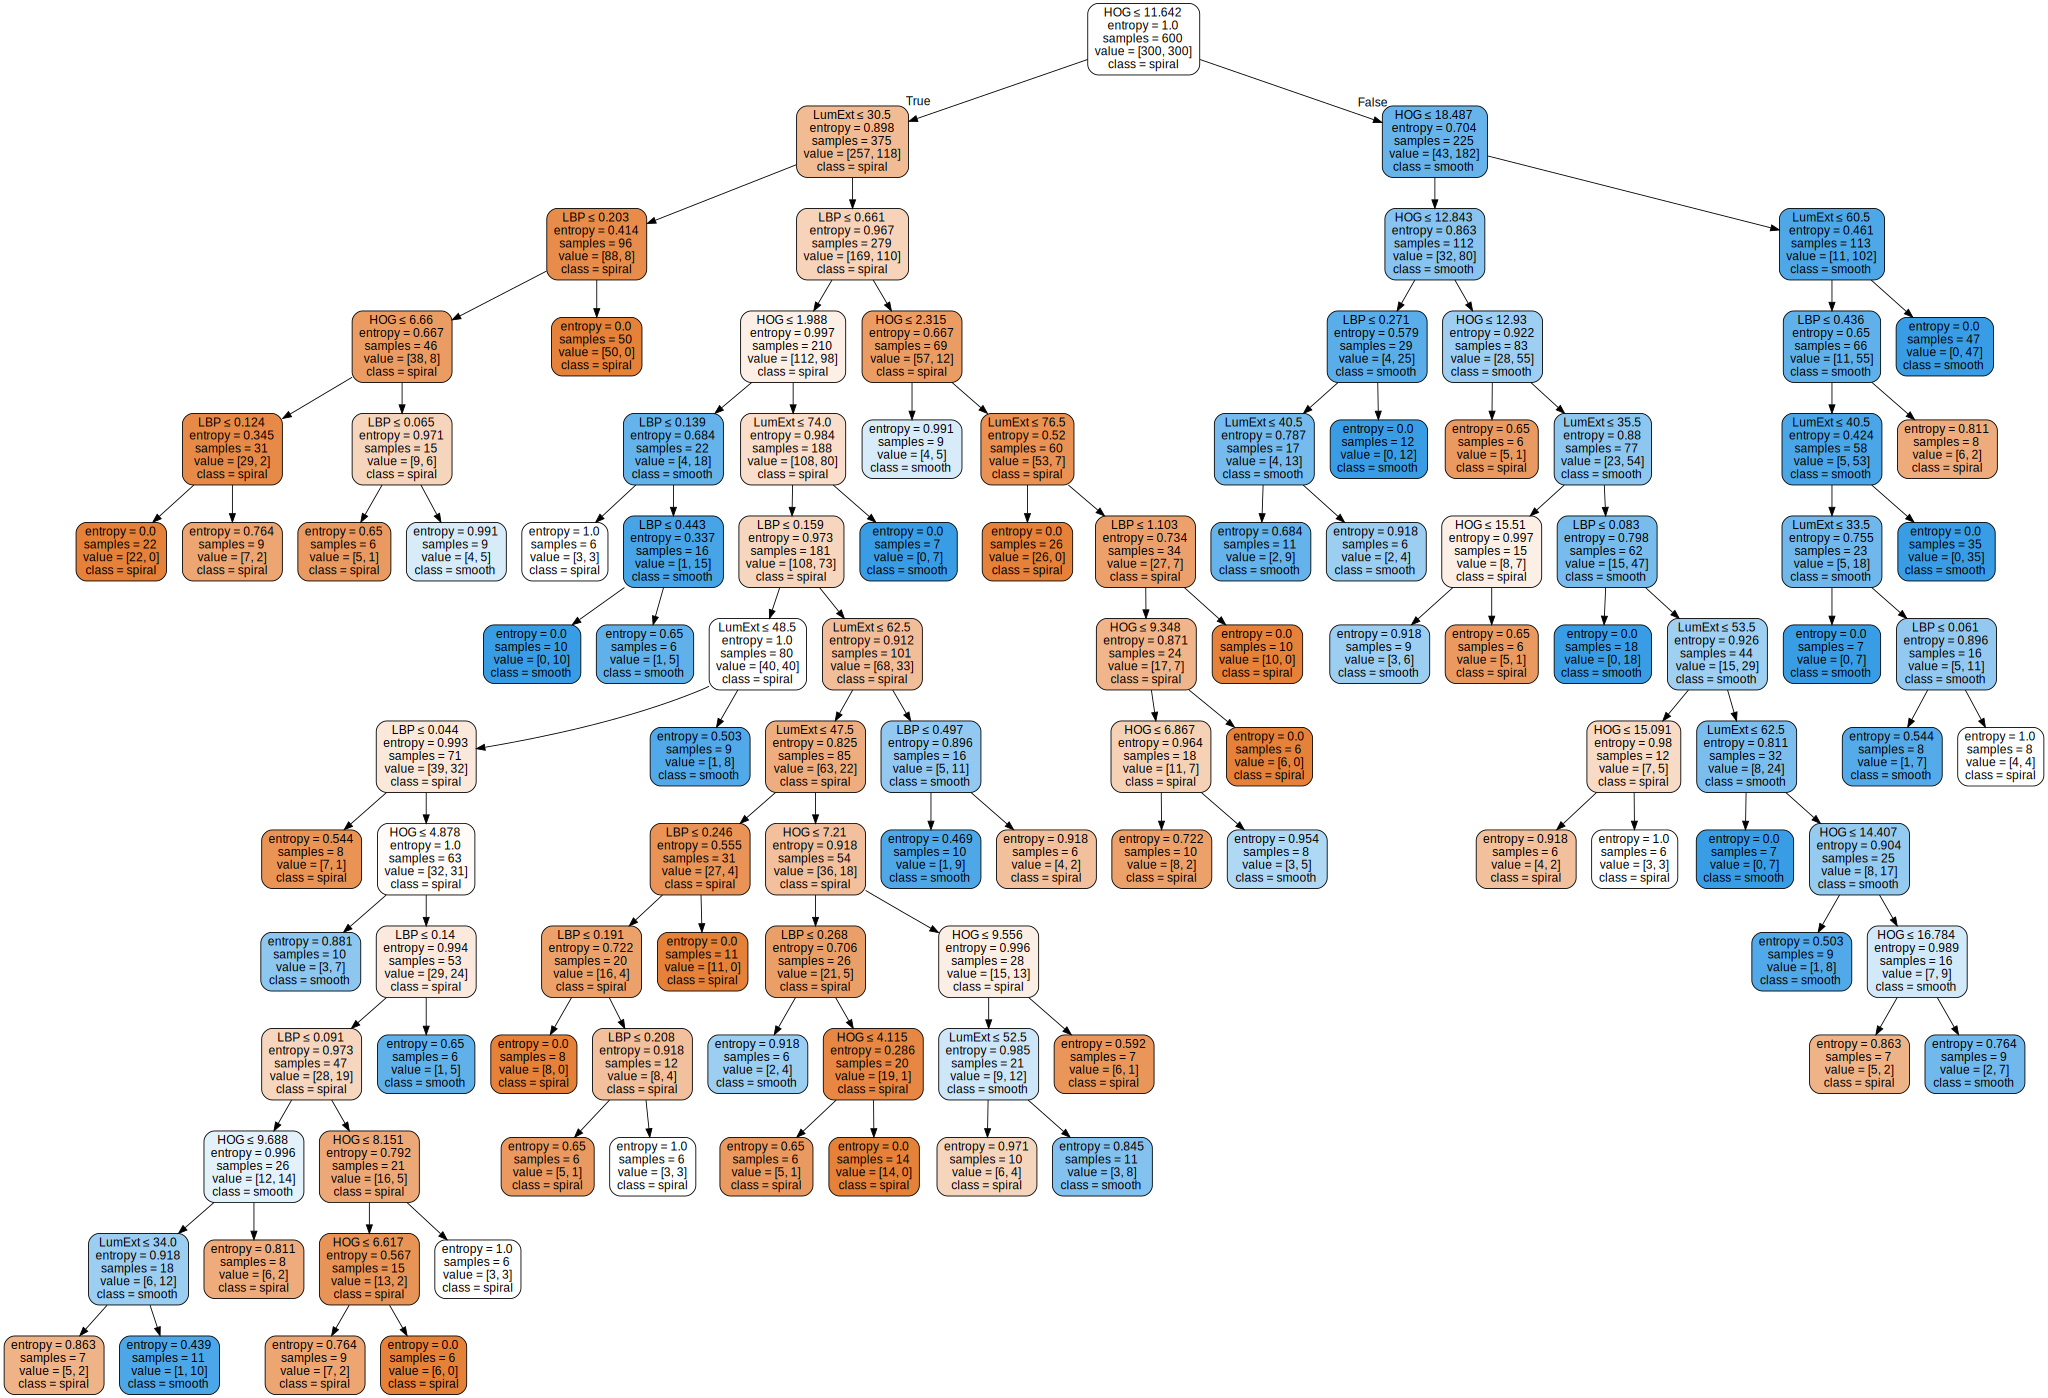

In [89]:
from sklearn import tree
import graphviz
# Train the Decision Tree with the training set
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6)
model = model.fit(X_train_data, Y_train_data)

#Visualisation of the tree
# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names = ['LBP', 'HOG', 'LumExt'],  
                         class_names = ['spiral', 'smooth'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.format = 'png'
#graph.render("Galaxie") 
graph 

### III.2. Analyse des performances du modèle

### III.2.2.  Extraction des données de test et de validation

In [119]:
X_test_crop = np.zeros((200, 100, 100, 3))
X_validation_crop = np.zeros((200, 100, 100, 3))

for index, el in enumerate(X_test):
    X_test_crop[index] = cropper_centre(X_test[index], 100, 100)
    
for index, el in enumerate(X_validation):
    X_validation_crop[index] = cropper_centre(X_validation[index], 100, 100)
    
    
lbp_primitives_test = extract_lbp_primitives(X_test_crop[0], X_test_crop)
hog_primitives_test = extract_hog_primitives(X_test_crop[0], X_test_crop)
LumExt_primitives_test = extract_LumExt_primitives(X_test_crop, None, 50)

lbp_primitives_validation = extract_lbp_primitives(X_validation_crop[0], X_validation_crop)
hog_primitives_validation = extract_hog_primitives(X_validation_crop[0], X_validation_crop)
LumExt_primitives_validation = extract_LumExt_primitives(X_validation_crop, None, 50)

#print(len(lbp_primitives_test))
#print(len(hog_primitives_test))
#print(len(LumExt_primitives_test))
#print(len(lbp_primitives_validation))
#print(len(hog_primitives_validation))
#print(len(LumExt_primitives_validation))

# On batit les tableaux de test et de validation correspondant
X_test_data = np.zeros((200,3))
X_validation_data = np.zeros((200,3))
count = 0
for i in range(len(X_test_data)) :
    X_test_data[count][0] = lbp_primitives_test[count]
    X_test_data[count][1] = hog_primitives_test[count]
    X_test_data[count][2] = LumExt_primitives_test[count]
    count+=1
print(X_test_data[:5])
print("________")
count = 0
for i in range(len(X_validation_data)) :
    X_validation_data[count][0] = lbp_primitives_validation[count]
    X_validation_data[count][1] = hog_primitives_validation[count]
    X_validation_data[count][2] = LumExt_primitives_validation[count]
    count+=1
print(X_validation_data[:5])

[[ 0.00000000e+00  0.00000000e+00  8.10000000e+01]
 [ 3.74965770e-01  4.45394903e+01  5.40000000e+01]
 [ 8.07880160e-02  2.53102706e+00  8.90000000e+01]
 [ 1.58089788e-01  1.60517928e+01  7.70000000e+01]
 [ 4.62543883e-01 -2.83372535e+00  5.10000000e+01]]
________
[[ 0.00000000e+00  0.00000000e+00  6.60000000e+01]
 [ 6.54525151e-02 -1.63180775e+01  7.00000000e+01]
 [ 2.82866303e-01 -1.03904681e+01  5.00000000e+01]
 [ 1.18265766e-01 -1.14580440e+01  5.70000000e+01]
 [ 2.58237361e-01 -1.87973443e+00  4.80000000e+01]]


### III.2.2.  Prediction

In [128]:
#Transformation de l'attribut cible en numerique pour les donnees de test
Y_test_data = np.zeros(200, dtype = "uint8")
v_index = 0
for i in Y_test_data : 
    if "smooth" in Y_test[v_index]:
        Y_test_data[v_index] = 0
    else :
        Y_test_data[v_index] = 1
    v_index+=1

Y_test_pred = model.predict(X_test_data)
Y_test_pred


#Transformation de l'attribut cible en numerique pour les donnees de validation
Y_validation_data = np.zeros(200, dtype = "uint8")
v_index = 0
for i in Y_validation_data : 
    if "smooth" in Y_validation[v_index]:
        Y_validation_data[v_index] = 0
    else :
        Y_validation_data[v_index] = 1
    v_index+=1
    
Y_validation_pred = model.predict(X_validation_data)
Y_validation_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0], dtype=uint8)

### III.2.3. Evaluation de la précision

In [130]:
# Evaluation de la metrics avec des donnees de test
from sklearn.metrics import accuracy_score
acc_galaxie_train = accuracy_score(Y_test_data, Y_test_pred )
print("Correct classification rate for test dataset = "+str(acc_galaxie_train*100)+"%")

Correct classification rate for test dataset = 66.0%


In [131]:
# Evaluation de la metrics avec des donnees de validation
from sklearn.metrics import accuracy_score
acc_galaxie_train = accuracy_score(Y_validation_data, Y_validation_pred )
print("Correct classification rate for validation dataset = "+str(acc_galaxie_train*100)+"%")

Correct classification rate for validation dataset = 56.49999999999999%


In [133]:
from sklearn.metrics import classification_report
target_names = ['smooth', 'spiral']
print( classification_report(Y_test_data, Y_train_pred, target_names=target_names))

             precision    recall  f1-score   support

     smooth       0.63      0.78      0.70       100
     spiral       0.71      0.54      0.61       100

avg / total       0.67      0.66      0.66       200



### Affichage de la matric de confusion

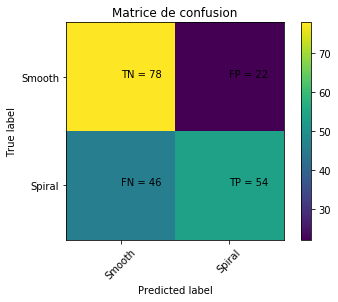

In [137]:
from sklearn.metrics import confusion_matrix
cm_galaxie_train = confusion_matrix(Y_test_data, Y_test_pred )
cm_galaxie_train

plt.imshow(cm_galaxie_train)
plt.title("Matrice de confusion")
plt.ylabel('True label')
classNames = ['Smooth','Spiral']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.xlabel('Predicted label')
#plt.tight_layout()
plt.colorbar()
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_galaxie_train[i][j]))
plt.show()


L'arbre de décision obtenu est en concordance avec nos prédictions. En effet, dans les grandes lignes, sont fonction est basé sur l'évaluation d'un score de séparation basé sur les primitives fournies. Il conserve ainsi la primitive ayant obtenu le meilleur pouvoir de séparation et s'il estime que la séparation est suffisamment efficace, il produit une feuille attestant de l'efficacité de cette séparation, notamment en montrant la proportion de classes correctement détectée et celles incorrectement détectées. Il est bon de noter qu'il s'agit de probabilité. Dans le cas où la séparation n'aura pas été suffisamment efficace (ex. [6, 5]), alors la prochaine primitive ayant le meilleur pouvoir discriminant est alors utilisée. Ce fonctionnement contenu ainsi de sorte à bâtir un aber d'efficacité de séparation. Si, d'aventure, il manque de primitives pour continuer le "raffinement" de la séparation par primitive, l'arbre s'arrête avec une feuille montrant la proportion de séparation, cette fois, attestant du manque de précision de la séparation et suggérant qu'il faille, soit ajouter des primitives ayant un bon pouvoir de discrimination, soit, aller plus profondément dans l'arbre. C'est sur ce dernier point que déterminer la profondeur de l'arbre a une influence, en effet, si on a suffisamment de primitives pour étoffer l'arbre de décision, mais une profondeur moindre, on arrivera à des feuilles aux résultats non satisfaisants. La complexité s'en trouverait accrue, mais les bénéfices sur le pouvoir de discrimination de l'algorithme sont indéniables quand on fournit une profondeur suffisante.

### III.3. Proposition d'améliorations possibles

Une autre primitive qui aurait pu être utilisée pour améliorer le pouvoir discriminant de la classification est le Principle Component Analysis (PCA). En effet, cette primitive se base sur une réduction de dimensionnalité des images permettant d'en extraire uniquement les informations pertinentes, combinées avec une analyse de l'orientation des bordures suite à un tel traitement aurait pu permettre d'extraire le caractère tournoyant des spirales et ainsi plus facilement les détecter. Aussi, une autre approche aurait été d'extraire davantage de primitives et les combiner afin d'augmenter le pouvoir discriminant de la classification.
Malheureusement, plus des primitives sont ajoutées et plus leurs combinaisons deviennent complexes. Il aurait donc fallu probablement, au préalable, combiner certaines primitives complémentaires, comme le LBP et HOG, afin d'obtenir un seul vecteur consolidé et augmentant le pouvoir discriminant de la primitive ainsi obtenue.


## Conclusion

Procéder à un apprentissage de séparation par classe est tout sauf simple. À travers le présent laboratoire, des recherches ont été effectuées à ce sujet et bon nombre d'articles utiles ont illustré les problèmes fréquemment rencontrés dans ce domaine ainsi que les pistes de solution. C'est à travers ces recherches qu'il aura donc été possible de voir la complexité que peut représenter l'extraction de certaines primitives ou de toute information pertinente d'un jeu de données. Fort heureusement, beaucoup de méthodes et de résolution d'équations complexes ont permis de maintenant simplifier les procédures d'extraction de primitives nécessaire autant à la reconnaissance d'objets que l'interprétation des données contenues dans une image sous plusieurs dimensions.
C'est suivant cette approche qu'une des premières étapes aura été de comprend ce que représente une primitive et d'énumérer celles qui pourraient être utile dans le contexte spécifique de ce laboratoire et donc pour les images de la base de données galaxie. Il est apparu assez rapidement que l'extraction d'une primitive sur mesure et adaptée au jeu de données à disposition était nécessaire. C'est pourquoi le choix s'est arrêté sur le LBP, HOG et la variation de l'intensité lumineuse en ligne droite. Ces primitives semblaient extraire de façon suffisante les caractéristiques propres aux spirales (et donc éliminer les "smooth"). D'autres primitives ont été considérées comme le PCA et l’"Image Moment", mais ont été mises de côté faute de temps et compte tenu de leur plus grande complexité à extraire.
Une des principales difficultés rencontrées aura été le prétraitement des images dont les particularités devaient être extraites. En effet, pour le LBP et le HOD, il fallait travailler avec des images à une seule dimension, donc en niveau de gris, et pour le nombre de points lumineux hors centre, il fallait ignorer les étoiles et autres bruits de fond, notamment à travers un crop adéquat. 
Une fois les images d'entrainement traitées, l'extraction des primitives s'est avérée moins efficace qu'anticipée. Le pouvoir discriminant de celles-ci était plus faible que prévu, il a donc fallu ajuster la stratégie de prélèvement afin d'obtenir une séparation effective sur un jeu de donnée précise, mais sélectionnée aléatoirement.
Une fois les primitives discriminantes extraites, il a été plus simple de monter un arbre de décision puis procéder à l'apprentissage par classe via ces primitives.
In fine, le résultat, bien que fonctionnel, montre qu'il y a matière à amélioration et une piste d'amélioration, serait de raffiner le prélèvement de ces primitives. Par exemple, le niveau de gris peut être modifié de sorte a accentuer les blancs et aggraver les noirs afin de créer un contraste plus prononcé, ce qui augmenterait la précision des données recueillies. Une autre piste d'amélioration serait d'ajouter des primitives et d'en combiner certaines en un seul vecteur de sorte à solidifier et augmenter leur pouvoir discriminant.
Ce laboratoire aura donc été un excellent exercice pour, non seulement comprendre le processus d'apprentissage machine à travers un jeu de données, mais également permettre la réalisation de la complexité inhérente à ce type d'activités et surtout l'importance de la phase d'extraction des primitives, car tout découle de celles-ci. Choisir les bonnes primitives et les extraire efficacement représente donc la clé vers un apprentissage efficace.


Sources internet :

- https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
- https://stackoverflow.com/questions/6090399/get-hog-image-features-from-opencv-python?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
- https://www.learnopencv.com/tag/hog/
- https://docs.opencv.org/3.2.0/d0/d49/tutorial_moments.html
- https://docs.opencv.org/3.4.0/dd/d49/tutorial_py_contour_features.html
- http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
- http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html